In [ ]:
# import các thư viện cơ bản
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [ ]:
#df = pd.read_csv('Matches.csv')
df0 = pd.read_csv('PL.csv')
df1 = pd.read_csv('LL.csv')
df2 = pd.read_csv('B.csv')
df3= pd.read_csv('S.csv')
df4 = pd.read_csv('L1.csv')

In [ ]:
df0["LeagueCode"] = 0
df1["LeagueCode"] = 1
df2["LeagueCode"] = 2
df3["LeagueCode"] = 3
df4["LeagueCode"] = 4

In [ ]:
df_all = pd.concat([df0, df1, df2, df3, df4], ignore_index=True)

In [ ]:
home_teams = set(df0["HomeTeam"].unique())
away_teams = set(df0["AwayTeam"].unique())

all_teams = sorted(home_teams.union(away_teams))
print(f"Tổng số đội bóng duy nhất: {len(all_teams)}")
for team in all_teams:
    print(team)

Tổng số đội bóng duy nhất: 31
Arsenal
Aston Villa
Bournemouth
Brentford
Brighton
Burnley
Cardiff
Chelsea
Crystal Palace
Everton
Fulham
Huddersfield
Ipswich
Leeds
Leicester
Liverpool
Luton
Man City
Man United
Newcastle
Norwich
Nott'm Forest
Sheffield United
Southampton
Stoke
Swansea
Tottenham
Watford
West Brom
West Ham
Wolves


In [ ]:
df_all.head()

,Date,Div,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,B365D,B365A,HomePoints,AwayPoints,HomeRank,AwayRank,HomeDiff,AwayDiff,season,LeagueCode
0,16/08/2024,E0,Man United,Fulham,1,0,H,0.0,0.0,D,...,4.20,5.25,0,0,20,20,0,0,E0_24_25,0
1,17/08/2024,E0,Ipswich,Liverpool,0,2,A,0.0,0.0,D,...,5.50,1.33,0,0,20,20,0,0,E0_24_25,0
2,17/08/2024,E0,Arsenal,Wolves,2,0,H,1.0,0.0,H,...,7.50,13.00,0,0,20,20,0,0,E0_24_25,0
3,17/08/2024,E0,Everton,Brighton,0,3,A,0.0,1.0,A,...,3.30,2.63,0,0,20,20,0,0,E0_24_25,0
4,17/08/2024,E0,Newcastle,Southampton,1,0,H,1.0,0.0,H,...,5.25,8.00,0,0,20,20,0,0,E0_24_25,0


In [ ]:
print(f"Số trận đấu : {df_all.shape[0]}")

Số trận đấu : 14075


In [ ]:
print(f"Số trận đấu Premier League: {df0.shape[0]}")
print(f"Số trận đấu Laliga: {df1.shape[0]}")
print(f"Số trận đấu Bundesliga: {df2.shape[0]}")
print(f"Số trận đấu Serie A: {df3.shape[0]}")
print(f"Số trận đấu Ligue 1: {df4.shape[0]}")

Số trận đấu Premier League: 2979
Số trận đấu Laliga: 2969
Số trận đấu Bundesliga: 2403
Số trận đấu Serie A: 2980
Số trận đấu Ligue 1: 2744


In [ ]:
missing_rows = df_all[df_all.isnull().any(axis=1)]
print(f"Số dòng bị thiếu dữ liệu: {len(missing_rows)}")
missing_rows[['Date','Div','HomeTeam','AwayTeam',]].head()

Số dòng bị thiếu dữ liệu: 6


,Date,Div,HomeTeam,AwayTeam
7599,14/12/2024,D1,Union Berlin,Bochum
9634,10/01/2022,I1,Torino,Fiorentina
10606,18/10/2020,I1,Udinese,Parma
10608,19/10/2020,I1,Verona,Genoa
12302,13/09/2020,F1,Paris SG,Marseille


In [ ]:
for df in [df0, df1, df2, df3, df4]:
    missing_rows = df[df.isnull().any(axis=1)]
    print(f"Số dòng bị thiếu dữ liệu: {len(missing_rows)}")
    missing_rows[['Date','Div','HomeTeam','AwayTeam',]].head()

Số dòng bị thiếu dữ liệu: 0
Số dòng bị thiếu dữ liệu: 0
Số dòng bị thiếu dữ liệu: 1
Số dòng bị thiếu dữ liệu: 3
Số dòng bị thiếu dữ liệu: 2


In [ ]:
df_all = df_all.dropna().reset_index(drop=True)

In [ ]:
# df0 = df0.dropna().reset_index(drop=True)
# df1 = df1.dropna().reset_index(drop=True)
df2 = df2.dropna().reset_index(drop=True)
df3 = df3.dropna().reset_index(drop=True)
df4 = df4.dropna().reset_index(drop=True)


In [ ]:
from dateutil import parser

df_all['Date'] = df_all['Date'].apply(lambda x: parser.parse(str(x), dayfirst=True) if pd.notnull(x) else None)
invalid_dates = df_all[df_all['Date'].isnull()]
print(f'Số dòng lỗi định dạng ngày: {len(invalid_dates)}')

Số dòng lỗi định dạng ngày: 0


In [ ]:
from dateutil import parser

df0['Date'] = df0['Date'].apply(lambda x: parser.parse(str(x), dayfirst=True) if pd.notnull(x) else None)
df1['Date'] = df1['Date'].apply(lambda x: parser.parse(str(x), dayfirst=True) if pd.notnull(x) else None)
df2['Date'] = df2['Date'].apply(lambda x: parser.parse(str(x), dayfirst=True) if pd.notnull(x) else None)
df3['Date'] = df3['Date'].apply(lambda x: parser.parse(str(x), dayfirst=True) if pd.notnull(x) else None)
df4['Date'] = df4['Date'].apply(lambda x: parser.parse(str(x), dayfirst=True) if pd.notnull(x) else None)

for df in [df0, df1, df2, df3, df4]:
    # Kiểm tra dòng nào bị lỗi khi chuyển ngày
    invalid_dates = df[df['Date'].isnull()]
    print(f'Số dòng lỗi định dạng ngày: {len(invalid_dates)}')

Số dòng lỗi định dạng ngày: 0
Số dòng lỗi định dạng ngày: 0
Số dòng lỗi định dạng ngày: 0
Số dòng lỗi định dạng ngày: 0
Số dòng lỗi định dạng ngày: 0


In [ ]:
 df_all = df_all.sort_values(by='Date').reset_index(drop=True)

In [ ]:
df0 = df0.sort_values(by='Date').reset_index(drop=True)
df1 = df1.sort_values(by='Date').reset_index(drop=True)
df2 = df2.sort_values(by='Date').reset_index(drop=True)
df3 = df3.sort_values(by='Date').reset_index(drop=True)
df4 = df4.sort_values(by='Date').reset_index(drop=True)

In [ ]:
df_all[((df_all["HomeTeam"]=="Real Madrid") | (df_all["AwayTeam"]=="Real Madrid")) & (df_all["Date"]>="2018-08-13")].head(10)

,Date,Div,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,B365D,B365A,HomePoints,AwayPoints,HomeRank,AwayRank,HomeDiff,AwayDiff,season,LeagueCode
1877,2018-08-19,SP1,Real Madrid,Getafe,2,0,H,1.0,0.0,H,...,7.00,13.00,0,0,20,20,0,0,SP1_18_19,1
1916,2018-08-26,SP1,Girona,Real Madrid,1,4,A,1.0,1.0,D,...,5.50,1.36,1,3,12,7,0,2,SP1_18_19,1
1945,2018-09-01,SP1,Real Madrid,Leganes,4,1,H,1.0,1.0,D,...,9.00,21.00,6,1,2,15,5,-1,SP1_18_19,1
2008,2018-09-15,SP1,Ath Bilbao,Real Madrid,1,1,D,1.0,0.0,H,...,4.33,1.53,4,9,7,2,1,8,SP1_18_19,1
2056,2018-09-22,SP1,Real Madrid,Espanol,1,0,H,1.0,0.0,H,...,7.00,15.00,10,7,2,5,8,2,SP1_18_19,1
2109,2018-09-26,SP1,Sevilla,Real Madrid,3,0,H,3.0,0.0,H,...,4.20,1.72,7,13,10,2,4,9,SP1_18_19,1
2126,2018-09-29,SP1,Real Madrid,Ath Madrid,0,0,D,0.0,0.0,D,...,3.50,3.75,13,11,3,4,6,4,SP1_18_19,1
2186,2018-10-06,SP1,Alaves,Real Madrid,1,0,H,0.0,0.0,D,...,4.75,1.36,11,14,6,2,2,6,SP1_18_19,1
2231,2018-10-20,SP1,Real Madrid,Levante,1,2,A,0.0,2.0,A,...,8.50,19.00,14,10,5,11,5,-2,SP1_18_19,1
2299,2018-10-28,SP1,Barcelona,Real Madrid,5,1,H,2.0,0.0,H,...,3.80,3.60,18,14,3,8,12,4,SP1_18_19,1


In [ ]:
print(f"\n⚽Thống kê kết quả FTR:")
print(df_all["FTR"].value_counts())


⚽Thống kê kết quả FTR:
FTR
H    6121
A    4395
D    3553
Name: count, dtype: int64


In [ ]:
dfs = [df0, df1, df2, df3, df4]
names = ["Premier League", "La Liga", "Bundesliga", "Serie A", "Ligue 1"]

for i, df in enumerate(dfs):
    print(f"\n⚽ {names[i]} - Thống kê kết quả FTR:")
    print(df["FTR"].value_counts())


⚽ Premier League - Thống kê kết quả FTR:
FTR
H    1322
A     975
D     682
Name: count, dtype: int64

⚽ La Liga - Thống kê kết quả FTR:
FTR
H    1327
A     842
D     800
Name: count, dtype: int64

⚽ Bundesliga - Thống kê kết quả FTR:
FTR
H    1058
A     750
D     594
Name: count, dtype: int64

⚽ Serie A - Thống kê kết quả FTR:
FTR
H    1238
A     961
D     778
Name: count, dtype: int64

⚽ Ligue 1 - Thống kê kết quả FTR:
FTR
H    1176
A     867
D     699
Name: count, dtype: int64


In [ ]:
df_all["FTR"] = df_all["FTR"].map({"H": 0, "D": 1, "A": 2})

In [ ]:
df_all["Season"]= df_all["Date"].dt.year

In [ ]:
#Mã hóa cột kết quả trận đấu
df0["FTR"] = df0["FTR"].map({"H": 0, "D": 1, "A": 2})
df1["FTR"] = df1["FTR"].map({"H": 0, "D": 1, "A": 2})
df2["FTR"] = df2["FTR"].map({"H": 0, "D": 1, "A": 2})
df3["FTR"] = df3["FTR"].map({"H": 0, "D": 1, "A": 2})
df4["FTR"] = df4["FTR"].map({"H": 0, "D": 1, "A": 2})


Lọc đặc trưng


In [ ]:
def features(df):
    df = df.copy()
    #lọc ra các trận thuộc sân nhà
    home = df[[ "Date", "HomeTeam",  "FTHG", "FTAG", "HS", "HST","HC"]].copy()
    home.columns = [ "Date", "Team" , "GF", "GA", "Sh", "ShT","Cn"]

    home["Point"] = df["FTR"].map({0: 3, 1: 1, 2: 0})
    home["Conv_rate"] = np.where(df["AS"] == 0, 0, df["FTAG"] / df["AS"])
    home["Win"] = df["FTR"].map({0: 1, 1: 0, 2: 0})
    home["Draw"] = df["FTR"].map({0: 0, 1: 1, 2: 0})
    home["Lose"] = df["FTR"].map({0: 0, 1: 0, 2: 1})

    #lọc ra các trận thuộc sân khách
    away = df[[ "Date", "AwayTeam", "FTAG", "FTHG", "AS","AST","AC"]].copy ()
    away.columns = [ "Date", "Team", "GF", "GA","Sh", "ShT" ,"Cn"]
    away["Point"] = df["FTR"].map({0: 0, 1: 1, 2: 3})
    away["Conv_rate"] = np.where(df["AS"] == 0, 0, df["FTAG"] / df["AS"])
    away["Win"] = df["FTR"].map({0: 0, 1: 0, 2: 1})
    away["Draw"] = df["FTR"].map({0: 0, 1: 1, 2: 0})
    away["Lose"] = df["FTR"].map({0: 1, 1: 0, 2: 0})

    #gộp lại theo cột
    team_matches = pd.concat([home, away])
    team_matches = team_matches.sort_values("Date")
    return team_matches


In [ ]:
team = features(df0)
team[team["Team"]=="Man City"].head(10)

,Date,Team,GF,GA,Sh,ShT,Cn,Point,Conv_rate,Win,Draw,Lose
2,2017-08-12,Man City,2,0,14,4,10,3,0.142857,1,0,0
19,2017-08-21,Man City,1,1,19,6,7,1,0.142857,0,1,0
21,2017-08-26,Man City,2,1,19,8,5,3,0.105263,1,0,0
33,2017-09-09,Man City,5,0,13,7,8,3,0.000000,1,0,0
42,2017-09-16,Man City,6,0,28,10,11,3,0.214286,1,0,0
56,2017-09-23,Man City,5,0,25,9,8,3,0.000000,1,0,0
64,2017-09-30,Man City,1,0,17,6,8,3,0.058824,1,0,0
76,2017-10-14,Man City,7,2,20,11,5,3,0.400000,1,0,0
84,2017-10-21,Man City,3,0,15,10,4,3,0.000000,1,0,0
90,2017-10-28,Man City,3,2,15,5,2,3,0.200000,1,0,0


In [ ]:
def rolling_averages(group, cols, new_cols):
    group = group.sort_values("Date")
    rolling_stats = group[cols].rolling(7, closed='left').mean()
    group[new_cols] = rolling_stats
    return group

In [ ]:
cols = ["GF", "GA", "Point", "Sh", "ShT",	"Conv_rate", "Win", "Draw","Lose","Cn"]
new_cols = [f"{c}_avg" for c in cols]

def apply_rolling(team_matches):
    team_matches = team_matches.groupby("Team").apply(rolling_averages, cols, new_cols=new_cols)
    return team_matches.reset_index(drop=True)

In [ ]:
team = apply_rolling(team);
team[team["Team"]=="Man City"].head(20)

<ipython-input-35-790c34e62d67>:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  team_matches = team_matches.groupby("Team").apply(rolling_averages, cols, new_cols=new_cols)


,Date,Team,GF,GA,Sh,ShT,Cn,Point,Conv_rate,Win,...,GF_avg,GA_avg,Point_avg,Sh_avg,ShT_avg,Conv_rate_avg,Win_avg,Draw_avg,Lose_avg,Cn_avg
3347,2017-08-12,Man City,2,0,14,4,10,3,0.142857,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3348,2017-08-21,Man City,1,1,19,6,7,1,0.142857,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3349,2017-08-26,Man City,2,1,19,8,5,3,0.105263,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3350,2017-09-09,Man City,5,0,13,7,8,3,0.000000,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3351,2017-09-16,Man City,6,0,28,10,11,3,0.214286,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3352,2017-09-23,Man City,5,0,25,9,8,3,0.000000,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3353,2017-09-30,Man City,1,0,17,6,8,3,0.058824,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3354,2017-10-14,Man City,7,2,20,11,5,3,0.400000,1,...,3.142857,0.285714,2.714286,19.285714,7.142857,0.094870,0.857143,0.142857,0.0,8.142857
3355,2017-10-21,Man City,3,0,15,10,4,3,0.000000,1,...,3.857143,0.571429,2.714286,20.142857,8.142857,0.131604,0.857143,0.142857,0.0,7.428571
3356,2017-10-28,Man City,3,2,15,5,2,3,0.200000,1,...,4.142857,0.428571,3.000000,19.571429,8.714286,0.111196,1.000000,0.000000,0.0,7.000000


In [ ]:
selected_cols = ["Team", "Date","GF_avg", "GA_avg", "Point_avg", "Sh_avg", "ShT_avg",	"Conv_rate_avg", "Cn_avg","Win_avg", "Draw_avg","Lose_avg"]
def select_cols(team_matches):
    team_matches = team_matches[selected_cols]
    return team_matches

In [ ]:
team = select_cols(team);
team[team["Team"]=="Man City"].head(20)

,Team,Date,GF_avg,GA_avg,Point_avg,Sh_avg,ShT_avg,Conv_rate_avg,Cn_avg,Win_avg,Draw_avg,Lose_avg
3347,Man City,2017-08-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3348,Man City,2017-08-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3349,Man City,2017-08-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3350,Man City,2017-09-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3351,Man City,2017-09-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3352,Man City,2017-09-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3353,Man City,2017-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3354,Man City,2017-10-14,3.142857,0.285714,2.714286,19.285714,7.142857,0.094870,8.142857,0.857143,0.142857,0.0
3355,Man City,2017-10-21,3.857143,0.571429,2.714286,20.142857,8.142857,0.131604,7.428571,0.857143,0.142857,0.0
3356,Man City,2017-10-28,4.142857,0.428571,3.000000,19.571429,8.714286,0.111196,7.000000,1.000000,0.000000,0.0


In [ ]:
def merge_back(df, team_matches):
    df = df.merge(
        team_matches.rename(columns={
            "Team": "HomeTeam",
            "Date": "Date",
            "Point_avg": "Home_point_avg",
            "GF_avg": "Home_avg_gf",
            "GA_avg": "Home_avg_ga",
            "Sh_avg": "Home_avg_sh",
            "ShT_avg": "Home_avg_sht",
            "Cn_avg": "Home_avg_cn",
            "Conv_rate_avg": "Home_conv_rate_avg",
            "Win_avg": "Home_win_avg",
            "Draw_avg": "Home_draw_avg",
            "Lose_avg": "Home_lose_avg"
        }),
        on=["Date", "HomeTeam"],
        how="left"
    )
    df = df.merge(
    team_matches.rename(columns={
        "Team": "AwayTeam",
        "Date": "Date",
        "Point_avg": "Away_point_avg",
        "GF_avg": "Away_avg_gf",
        "GA_avg": "Away_avg_ga",
        "Sh_avg": "Away_avg_sh",
        "ShT_avg": "Away_avg_sht",
        "Cn_avg": "Away_avg_cn",
        "Conv_rate_avg": "Away_conv_rate_avg",
        "Win_avg": "Away_win_avg",
        "Draw_avg": "Away_draw_avg",
        "Lose_avg": "Away_lose_avg"
    }),
    on=["Date", "AwayTeam"],
    how="left"
    )
    #df = df.sort_values("Date")
    return df

In [ ]:
df0 = merge_back(df0,team)

In [ ]:
print(df0.isnull().sum().sort_values(ascending=False))

Date                  0
Div                   0
HomeTeam              0
AwayTeam              0
FTHG                  0
FTAG                  0
FTR                   0
HTHG                  0
HTAG                  0
HTR                   0
HS                    0
AS                    0
HST                   0
AST                   0
HC                    0
AC                    0
HF                    0
AF                    0
HY                    0
AY                    0
HR                    0
AR                    0
B365H                 0
B365D                 0
B365A                 0
HomePoints            0
AwayPoints            0
HomeRank              0
AwayRank              0
HomeDiff              0
AwayDiff              0
season                0
LeagueCode            0
Home_avg_gf           0
Home_avg_ga           0
Home_point_avg        0
Home_avg_sh           0
Home_avg_sht          0
Home_conv_rate_avg    0
Home_avg_cn           0
Home_win_avg          0
Home_draw_avg   

In [ ]:
df_all[(df_all["HomeTeam"]=="Man City") | (df_all["AwayTeam"]=="Man City")].head(10)

,Date,Div,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,Away_avg_gf,Away_avg_ga,Away_point_avg,Away_avg_sh,Away_avg_sht,Away_conv_rate_avg,Away_avg_cn,Away_win_avg,Away_draw_avg,Away_lose_avg
18,2017-08-12,E0,Brighton,Man City,0,2,2,0.0,0.0,D,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
78,2017-08-21,E0,Man City,Everton,1,1,1,0.0,1.0,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
85,2017-08-26,E0,Bournemouth,Man City,1,2,2,1.0,1.0,D,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
132,2017-09-09,E0,Man City,Liverpool,5,0,0,2.0,0.0,H,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
196,2017-09-16,E0,Watford,Man City,0,6,2,0.0,3.0,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
270,2017-09-23,E0,Man City,Crystal Palace,5,0,0,1.0,0.0,H,...,0.0,1.6,0.0,14.2,3.2,0.147527,6.6,0.0,0.0,1.0
327,2017-09-30,E0,Chelsea,Man City,0,1,2,0.0,0.0,D,...,3.8,0.4,2.6,20.8,8.0,0.092481,7.8,0.8,0.2,0.0
371,2017-10-14,E0,Man City,Stoke,7,2,0,3.0,1.0,H,...,1.2,2.0,1.0,13.8,3.8,0.173916,4.8,0.2,0.4,0.4
421,2017-10-21,E0,Man City,Burnley,3,0,0,1.0,0.0,H,...,0.8,0.4,1.8,7.8,3.2,0.105000,3.6,0.4,0.6,0.0
470,2017-10-28,E0,West Brom,Man City,2,3,2,1.0,2.0,A,...,4.4,0.4,3.0,21.0,9.2,0.134622,7.2,1.0,0.0,0.0


In [ ]:
rolling_cols = [col for col in df0.columns if "_avg" in col]
df0 = df0.dropna(subset=rolling_cols)

In [ ]:
def generate_features(df):
    team_matches =  features(df)
    team_matches = apply_rolling(team_matches)
    team_matches = select_cols(team_matches)
    df = merge_back(df, team_matches)
    return df

In [ ]:
  df0 = generate_features(df0)
  df1 = generate_features(df1)
  df2 = generate_features(df2)
  df3 = generate_features(df3)
  df4 = generate_features(df4)

<ipython-input-176-01f91d33a40f>:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  team_matches = team_matches.groupby("Team").apply(rolling_averages, cols, new_cols=new_cols)
<ipython-input-176-01f91d33a40f>:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  team_matches = team_matches.groupby("Team").apply(rolling_averages, cols, new_cols=new_cols)
<ipython-input-176-01f91d33a40f>:5: DeprecationWarning: Data

In [ ]:
def tinh_dac_trung(df):
    # 1. Phong độ tổng quát
    df["diff_point"] = df["HomePoints"] - df["AwayPoints"]
    df["diff_rank"] = df["HomeRank"] - df["AwayRank"]
    df["rank_gap"] = abs(df["diff_rank"])

    # 2. Phong độ gần đây
    df["diff_point_avg_5"] = df["Home_point_avg"] - df["Away_point_avg"]
    df["diff_Win"]  = df["Home_win_avg"] - df["Away_win_avg"]
    df["diff_Lose"] = df["Home_lose_avg"] - df["Away_lose_avg"]
    df["diff_Draw"] = df["Home_draw_avg"] - df["Away_draw_avg"]

    # 3. Tấn công – phòng ngự
    df["diff_gf"] = df["Home_avg_gf"] - df["Away_avg_gf"]
    df["diff_ga"] = df["Home_avg_ga"] - df["Away_avg_ga"]
    df["diff_sh"] = df["Home_avg_sh"] - df["Away_avg_sh"]
    df["diff_sht"] = df["Home_avg_sht"] - df["Away_avg_sht"]
    df["diff_conv_avg"] = df["Home_conv_rate_avg"] - df["Away_conv_rate_avg"]

    df["draw_tendency"] = (df["Home_draw_avg"] + df["Away_draw_avg"]) / 2

    df["diff_f88"]  = df["B365H"] - df["B365A"]

    df["is_draw_like"] = (
        (df["rank_gap"] <= 8) &  # dễ hòa khi không quá lệch
        (abs(df["diff_point_avg_5"]) <= 2) &  # hai đội phong độ gần gần nhau
        (abs(df["diff_Win"]) <= 0.25) &
        (abs(df["diff_Lose"]) <= 0.25) &
        (df["draw_tendency"] >= 0.15)  # cả hai có xu hướng hòa nhẹ
    ).astype(int)


    return df


In [ ]:
   dt = tinh_dac_trung(df0)
   #dt = tinh_dac_trung(df_all)
  #df1 = tinh_dac_trung(df1)
  # df2 = tinh_dac_trung(df2)
  # df3 = tinh_dac_trung(df3)
  # df4 = tinh_dac_trung(df4)

In [ ]:
# 1. Chuẩn bị bảng đặc trưng đã tính
# features_df =  dt[["HomePoints","AwayPoints","diff_point",
#                   "Home_win_avg","Away_win_avg","diff_Win",
#                   "Home_point_avg","Away_point_avg","diff_point_avg_5",
#                   "Home_lose_avg","Away_lose_avg","diff_Lose",
#                   "Home_draw_avg","Away_draw_avg","diff_Draw",
#                   "Home_avg_gf","Away_avg_gf","diff_gf",
#                   "Home_avg_ga","Away_avg_ga","diff_ga",
#                   "Home_avg_sh","Away_avg_sh","diff_sh",
#                   "Home_avg_sht","Away_avg_sht","diff_sht",
#                   "Home_conv_rate_avg","Away_conv_rate_avg","diff_conv_avg",
#                   "draw_tendency",
#                   "rank_gap","diff_rank",
#                   "B365H","B365A","B365D","diff_f88",
#                   "is_draw_like",
#                   "FTR"
#                   ]]


features_df = dt.copy()



features_df.head()

,Date,Div,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,diff_Lose,diff_Draw,diff_gf,diff_ga,diff_sh,diff_sht,diff_conv_avg,draw_tendency,diff_f88,is_draw_like
70,2017-10-14,E0,Watford,Arsenal,2,1,0,0,1,A,...,-0.142857,0.285714,0.000000,0.571429,-6.285714,-3.285714,0.083405,0.285714,3.60,1
71,2017-10-14,E0,Tottenham,Bournemouth,1,0,0,0,0,D,...,-0.571429,0.142857,1.428571,-0.857143,8.714286,3.285714,0.092762,0.214286,-13.80,0
72,2017-10-14,E0,Swansea,Huddersfield,2,0,0,1,0,H,...,0.285714,-0.142857,-0.285714,0.142857,-3.428571,-1.571429,0.010399,0.357143,-1.55,0
73,2017-10-14,E0,Liverpool,Man United,0,0,1,0,0,D,...,0.142857,0.285714,-1.142857,1.428571,2.571429,0.142857,0.020861,0.285714,0.00,0
74,2017-10-14,E0,Crystal Palace,Chelsea,2,1,0,2,1,H,...,0.714286,-0.142857,-1.714286,1.571429,-0.571429,-2.000000,-0.077120,0.071429,7.60,0


In [ ]:
# Chọn các đặc trưng số đã tính (lọc bớt cột text, ngày tháng...)
numerical_cols = features_df.select_dtypes(include=['float64', 'int64']).columns

# Tính tương quan với FTR_num
correlations = features_df[numerical_cols].corr()['FTR'].drop(['FTR']).sort_values(key=abs, ascending=False)

# Hiển thị top 15 đặc trưng ảnh hưởng nhiều nhất
print(correlations.head(50))


FTAG                  0.653137
FTHG                 -0.649583
AST                   0.438828
HTAG                  0.429748
HST                  -0.428843
HTHG                 -0.426752
diff_f88              0.413036
B365H                 0.378446
diff_rank             0.349381
B365A                -0.349150
diff_point           -0.347661
diff_sh              -0.333113
diff_sht             -0.328240
diff_point_avg_5     -0.318527
diff_gf              -0.312158
diff_Win             -0.306460
AS                    0.301708
diff_Lose             0.290331
HomeRank              0.276087
HomeDiff             -0.272783
HS                   -0.263562
diff_ga               0.252218
AwayDiff              0.242685
Home_point_avg       -0.237449
Home_avg_sh          -0.233031
Away_avg_sh           0.232004
Away_avg_sht          0.230093
Home_avg_sht         -0.229735
Home_avg_gf          -0.227104
Home_lose_avg         0.227018
Home_win_avg         -0.222310
Away_point_avg        0.220731
Away_win

In [ ]:
selected_features = [
    # Phong độ tổng quát
    "LeagueCode",
    "diff_rank",
    "diff_point_avg_5",
    "diff_Win",
    "diff_Lose",
    #"draw_tendency",
    "diff_Draw",
    #"diff_f88",

    # Tấn công – phòng ngự
    "diff_gf",
    "diff_ga",
    "diff_sht",
    "diff_conv_avg",

    # Nhận diện trận hòa
     "is_draw_like"
]

In [ ]:
# Đảm bảo Date là datetime
features_df["Date"] = pd.to_datetime(features_df["Date"])

# Chia theo thời gian thực tế28/05/2023 19/05/2024
train_df = features_df[features_df["Date"] < "2024-06-30"]

test_df  = features_df[features_df["Date"] > "2024-06-30"]

# Tách feature và label
X_train, y_train = train_df[selected_features], train_df["FTR"]
X_test, y_test   = test_df[selected_features],  test_df["FTR"]


In [ ]:
print(X_train.isnull().sum().sort_values(ascending=False).head(10))

LeagueCode          0
diff_rank           0
diff_point_avg_5    0
diff_Win            0
diff_Lose           0
diff_Draw           0
diff_gf             0
diff_ga             0
diff_sht            0
diff_conv_avg       0
dtype: int64


In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE

# ⚠️ Dùng tập đã chia theo thời gian: X_train, y_train, X_val, y_val, X_test, y_test

# 1. Cân bằng class bằng SMOTE cho tập huấn luyện
sm = SMOTE(random_state=42)
X_train_bal, y_train_bal = sm.fit_resample(X_train, y_train)

# 2. Khởi tạo và train mô hình
model = XGBClassifier(
    objective="multi:softprob",  # Cho ra xác suất nhiều lớp
    eval_metric="mlogloss",      # Log loss cho đa lớp
    use_label_encoder=False,     # Tránh warning
    n_estimators=200,
    max_depth=4,
    learning_rate=0.07,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)
model.fit(X_train_bal, y_train_bal)

# 4. Đánh giá cuối cùng trên tập test
print(" Evaluation on TEST set:")
y_test_pred = model.predict(X_test)
print(classification_report(y_test, y_test_pred))


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:35:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


 Evaluation on TEST set:
              precision    recall  f1-score   support

           0       0.52      0.66      0.58       128
           1       0.31      0.13      0.19        76
           2       0.55      0.59      0.57       108

    accuracy                           0.51       312
   macro avg       0.46      0.46      0.45       312
weighted avg       0.48      0.51      0.48       312



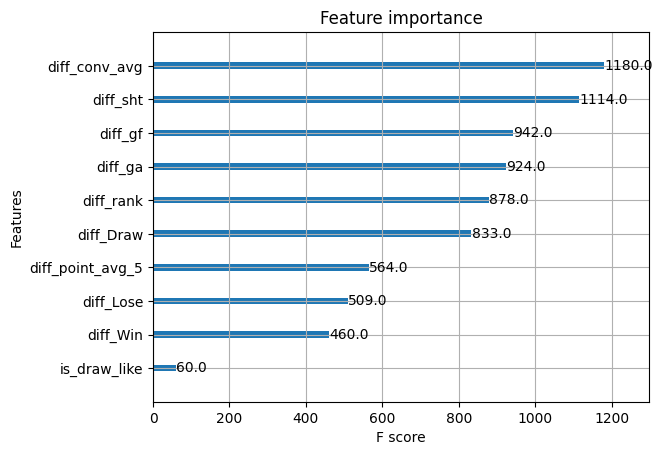

In [ ]:
import matplotlib.pyplot as plt
from xgboost import plot_importance

plot_importance(model, max_num_features=20)
plt.show()


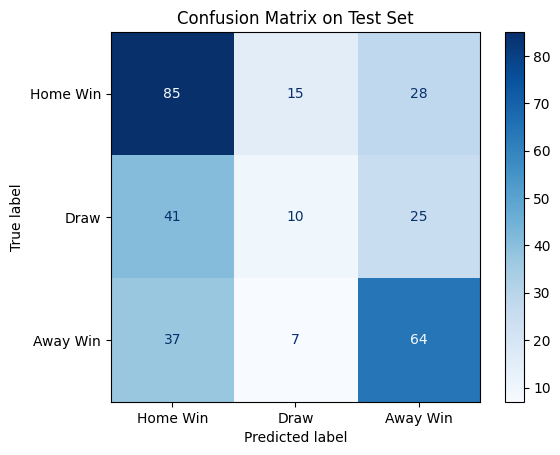

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Tạo ma trận nhầm lẫn
cm = confusion_matrix(y_test, y_test_pred)

# In ma trận
labels = ["Home Win", "Draw", "Away Win"]
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix on Test Set")
plt.show()


In [ ]:
from sklearn.metrics import log_loss, brier_score_loss

print("Log loss:", log_loss(y_test, model.predict_proba(X_test)))

Log loss: 1.0540534328323439


In [ ]:
import pandas as pd

proba_df = pd.DataFrame(model.predict_proba(X_test), columns=["Đội nhà thắng", "Hoà", "đội khách thắng"])
proba_df["true_label"] = y_test.reset_index(drop=True)
proba_df["predicted"] = model.predict(X_test)

proba_df.head(30)

,Đội nhà thắng,Hoà,đội khách thắng,true_label,predicted
0,0.408507,0.335453,0.256040,0,0
1,0.770004,0.074756,0.155240,0,0
2,0.406807,0.165876,0.427318,2,2
3,0.859543,0.036419,0.104038,0,0
4,0.309978,0.294485,0.395536,1,2
5,0.506988,0.198643,0.294369,2,0
6,0.211122,0.212123,0.576755,2,2
7,0.397277,0.257927,0.344796,0,0
8,0.482238,0.299647,0.218115,1,0
9,0.240014,0.363149,0.396836,2,2


In [ ]:
import joblib

joblib.dump(model, "model/xgb_model.pkl")

FileNotFoundError: [Errno 2] No such file or directory: 'model/xgb_model.pkl'